In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from src.PPO.PPO import PPO

# env = gym.make('CartPole-v1')
env = gym.make('LunarLander-v2')
env.seed(1234)

state_size = env.observation_space.shape[0]
action_size =env.action_space.n

# PPO Settings
update_every = 2000 # This is the roll out length
num_learn = 20
win_condition = 200

# Agent settings
hidden_size=512
epsilon=0.2
entropy_beta=0.01
gamma=0.99
lr=0.002

agent = PPO(state_size, action_size, hidden_size=hidden_size, epsilon=epsilon, entropy_beta=entropy_beta, gamma=gamma, lr=lr)

In [16]:
def train(n_episodes=2000, max_t=700):
  steps = 0
  scores_deque = deque(maxlen=100)
  scores = []
  average_scores = []
  max_score = -np.Inf

#   agent = PPO(state_size, action_size, hidden_size=hidden_size, epsilon=epsilon, entropy_beta=entropy_beta, gamma=gamma, lr=lr)

  for episode in range(1, n_episodes+1):
    state = env.reset()
    score = 0
    
    for t in range(max_t):
      steps += 1

      action, log_prob = agent.act(torch.FloatTensor(state))
      next_state, reward, done, _ = env.step(action.item())

      agent.mem.add(torch.FloatTensor(state), action, reward, log_prob, done)

      # Update 
      state = next_state
      score += reward

      if steps >= update_every:
        agent.learn(num_learn)
        agent.mem.clear()
        steps = 0

      if done:
        break
    
    # Book Keeping
    scores_deque.append(score)
    scores.append(score)
    average_scores.append(np.mean(scores_deque))
      
    if episode % 10 == 0:
      print("\rEpisode {}	Average Score: {:.2f}	Score: {:.2f}".format(episode, np.mean(scores_deque), score), end="")
    if episode % 100 == 0:
      print("\rEpisode {}	Average Score: {:.2f}".format(episode, np.mean(scores_deque)))   
    
    if np.mean(scores_deque) > win_condition:
      print("\rEnvironment Solved in {} episodes!".format(episode))
      break


  return scores, average_scores

In [17]:
scores, average_scores = train(n_episodes=2000)

Episode 100	Average Score: -107.13	Score: -45.24
Episode 200	Average Score: -66.29	Score: 20.1230
Episode 300	Average Score: -30.95	Score: -149.35
Episode 400	Average Score: 187.67	Score: 277.43
Environment Solved in 409 episodes!


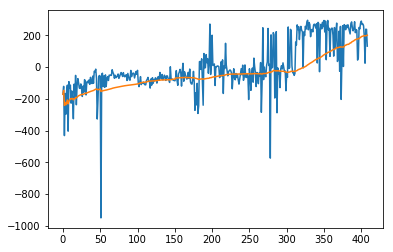

In [18]:
plt.plot(scores)
plt.plot(average_scores)

In [22]:
# torch.save(agent.model.state_dict(), "lunar_lander_ppo_model.pth")
# torch.save(agent.model_old.state_dict(), "lunar_lander_ppo_model_old.pth")

In [ ]:
model_path="trained_models/ppo/lunar_lander_ppo_model.pth"
model_old_path="trained_models/ppo/lunar_lander_ppo_model_old.pth"

agent.model.load_state_dict(torch.load(model_path))
agent.model_old.load_state_dict(torch.load(model_old_path))

In [19]:
env = gym.wrappers.Monitor(env, "./vid", video_callable=lambda episode_id: True,force=True)

for episode in range(1model_path="trained_models/ppo/Pendulum-v0_ppo_model.pth"
model_old_path="trained_models/ppo/Pendulum-v0_ppo_model_old.pth"

agent.model.load_state_dict(torch.load(model_path))
agent.model_old.load_state_dict(torch.load(model_old_path))):
    state = env.reset()
    score = 0
    input()

    for t in range(700):
        action, log_prob = agent.act(torch.FloatTensor(state))
        next_state, reward, done, _ = env.step(action.item())
        env.render()
        
        score += reward
        
        if done:
            print(score)
            break;
        
        state = next_state

env.close()